<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Creating-a-circuit" data-toc-modified-id="Creating-a-circuit-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Creating a circuit</a></span><ul class="toc-item"><li><span><a href="#QAOA-problem-graph" data-toc-modified-id="QAOA-problem-graph-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>QAOA problem graph</a></span></li><li><span><a href="#Universal-interface" data-toc-modified-id="Universal-interface-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Universal interface</a></span><ul class="toc-item"><li><span><a href="#Cirq" data-toc-modified-id="Cirq-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Cirq</a></span></li><li><span><a href="#Qiskit" data-toc-modified-id="Qiskit-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Qiskit</a></span></li></ul></li></ul></li></ul></div>

# QTensor usage

## Creating a circuit


In [12]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.1',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.6.0',
 'qiskit-aqua': '0.6.5',
 'qiskit': '0.17.0'}

In [10]:
# Qtensor branch: dev
import networkx as nx
from qensor import QAOAComposer
from qensor import CirqQAOAComposer, QtreeQAOAComposer


### QAOA problem graph

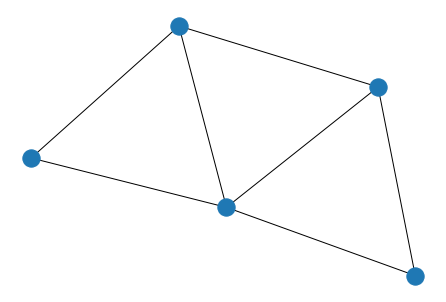

In [13]:

G = nx.erdos_renyi_graph(5, 3/(5-1))
nx.draw_kamada_kawai(G)

### Universal interface
#### Cirq

In [6]:
p = 1
cirq_qaoa = CirqQAOAComposer(G, gamma=[.1]*p, beta=[.2]*p)
cirq_qaoa.ansatz_state()
cirq_qaoa.circuit

┌──┐           ┌──┐   ┌──┐           ┌──┐
0: ───H────@──────────────@──────@──────────────@─────X^0.4───────────────────────────────────────────────────────────
           │              │      │              │
1: ───H────┼@─────────────┼@─────┼@─────────────┼@────X^0.4───────────────────────────────────────────────────────────
           ││             ││     ││             ││
2: ───H────┼X────Z^0.2────┼X─────┼┼─────────────┼┼────@───────────────@───@───────────@───X^0.4───────────────────────
           │              │      ││             ││    │               │   │           │
3: ───H────X─────Z^0.2────X──────┼X────Z^0.2────┼X────X───────Z^0.2───X───┼───────────┼───@───────────────@───X^0.4───
                                 │              │                         │           │   │               │
4: ───H──────────────────────────X─────Z^0.2────X─────────────────────────X───Z^0.2───X───X───────Z^0.2───X───X^0.4───
          └──┘           └──┘   └──┘           └──┘

#### Qiskit

In [7]:
from qensor import QiskitCreator

# Add methods from QiskitCreator to QAOAComposer
class QiskitQAOAComposer(QAOAComposer, QiskitCreator):
    pass

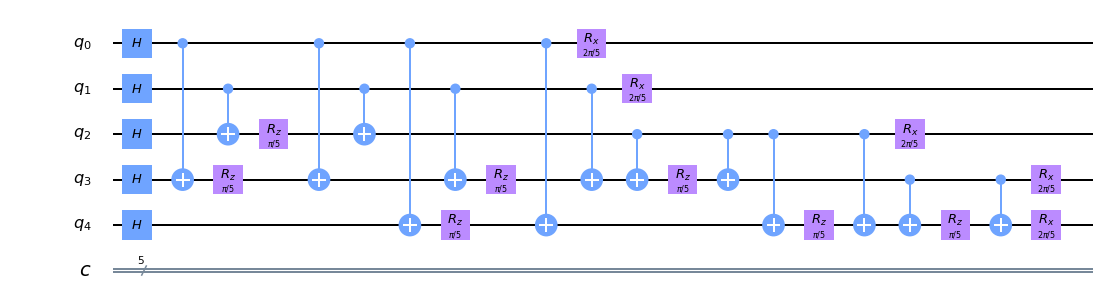

In [8]:
p = 1
cirq_qaoa = QiskitQAOAComposer(G, gamma=[.1]*p, beta=[.2]*p)
cirq_qaoa.ansatz_state()
cirq_qaoa.circuit.draw('mpl')